<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')



In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.info() 
#before running df.isnull().sum() you can already see that Alley, FireplacesQu, PoolQC, Fence, and MiscFeature are full of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [14]:
df.describe()["min":"max"] 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
min,1.00,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.00,0.0,0.0,0.00,334.00,0.0,0.0,334.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.75,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.00,0.0,223.0,795.75,882.00,0.0,0.0,1129.50,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.50,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.50,0.0,477.5,991.50,1087.00,0.0,0.0,1464.00,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1980.0,2.0,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.25,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.25,0.0,808.0,1298.25,1391.25,728.0,0.0,1776.75,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.00,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.00,1474.0,2336.0,6110.00,4692.00,2065.0,572.0,5642.00,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,2010.0,4.0,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0



Useful summary statistics:
for example, without plotting a histogram, one can see that the median house price is much closer to the min than the max, 
which indicates a possible skew or at least the presense of outliers


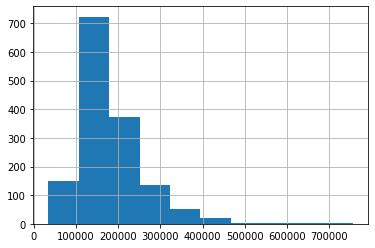

In [12]:
df.SalePrice.hist() #confimation of right-skewness

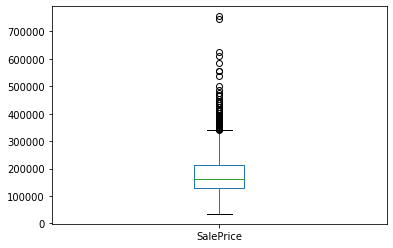

In [18]:
df.SalePrice.plot(kind="box")  

confirmation of outliers (in fact, there are so many outliers that one wonders if high-value property should be analyzed separately). That, of course, assumes that price is the y-variable of interest

In [20]:
df.dtypes.tolist()  #used "tolist()" to avoid setting pd.set_options

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype(

In [21]:
df.LotFrontage.value_counts(dropna=False) #demonstrating the use of the "dropna=False" param

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
small_df = df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy() 

used ".copy()" to avoid SettingWithCopyWarning

In [0]:
small_df['TotalSquareFootage'] = small_df['TotalBsmtSF'] + small_df['1stFlrSF'] + small_df['2ndFlrSF']

In [24]:
small_df

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343
...,...,...,...,...,...
1455,953,953,694,175000,2600
1456,1542,2073,0,210000,3615
1457,1152,1188,1152,266500,3492
1458,1078,1078,0,142125,2156


In [0]:
small_df["PricePerSqFt"] = small_df['SalePrice'] / small_df['TotalSquareFootage']  
#experiment with ratio combinations when preparing data for a ML model
#in this case, ratio is also useful for interpreting the "value per unit-of-measure" of a house, 
#which may have useful implications

In [29]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-01-14 20:59:59--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [          <=>       ]  21.72M   428KB/s    in 53s     

2020-01-14 21:00:52 (421 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22776791]



use !wget when downloading data from a link that downloads automatically

In [30]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


!unzip is self-explantory bash command

In [31]:
!head LoanStats_2018Q4.csv 


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
# the bash version of head() is !head  

In [33]:
df = pd.read_csv('LoanStats_2018Q4.csv')
print(df.shape)
df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128400, 1)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title               emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt     total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       6000      6000        6000             36 months  14.47%  206.44      C     C2        Manager                 10+ years  RENT           55000      Verified            Dec-2018 Charged Off n          NaN NaN  credit_card        Credit card refinancing 104xx    NY         10.65 0           Jun-2006         0              NaN                    NaN                    6        0       4196      91.2%      8         w                   0.00      0.00          1106.52         1106.52         546.14          272.38        0.0                288.0      51.84                   Apr-2019     206.44          NaN          Nov-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            12514       0           2           1           1           9                  8318         74      1           1           2807       79       4600             1      0           2            2                    2086        344            92      0                        0           33                 150                  9                     9              0        9                    NaN                      9                     NaN                            0                     3              4               3           3         3         4             5             4                   6        0                0            0                  2                  100            100

In [34]:
df.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   3291.41 3291.41 2373.85 2373.85 1708.59 665.26  0.0 0.0 0.0 Dec-2019 169.83 Jan-2020 Nov-2019 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   6497.81 6335.37 4572.16 4457.86 3502.19 1069.97 0.0 0.0 0.0 Dec-2019 327.68 Jan-2020 Nov-2019 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   6695.63 6695.63 4975.73 4975.73 3304.37 1671.36 0.0 0.0 0.0 Dec-2019 356.08 Jan-2020 Nov-2019 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050652925 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820081797  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N


##Two issues
1.   **comments at bottom of file interepeted as rows**
2.   **link at top of file caused the entire df to be interpreted as a header (this isn't immediately obvious, the only indication is that the font is boldface)**



In [36]:
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


(128397, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,...,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,NaN,NaN,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,...,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,...,50.0,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,...,20.0,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,...,25.0,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)

drop columns full of null values

In [42]:
df.info() #output is smaller this time.  I think this may be because df has been assigned twice in this notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128397 entries, 0 to 128396
Columns: 140 entries, loan_amnt to settlement_term
dtypes: float64(53), int64(51), object(36)
memory usage: 137.1+ MB


In [43]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,128397.000000,128397.000000,128397.000000,128397.000000,1.283970e+05,128160.000000,128397.000000,128397.000000,56207.000000,15447.000000,128397.000000,128397.000000,1.283970e+05,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,29174.000000,128397.0,1.677800e+04,16778.000000,128397.0,128397.000000,1.283970e+05,128397.000000,128397.000000,128397.000000,128397.000000,123919.000000,1.283970e+05,108123.000000,128397.000000,...,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,125538.0,128397.0,128397.000000,128397.000000,128397.000000,126705.000000,128397.000000,128397.0,1.283970e+05,1.283970e+05,128397.000000,1.283970e+05,1.677800e+04,16778.000000,16778.000000,16778.000000,16520.000000,16778.000000,16778.000000,16778.000000,16778.000000,5152.000000,233.0,233.000000,233.0,233.000000,206.000000,233.000000,233.000000,451.000000,451.000000,451.000000
mean,15971.190332,15971.190332,15968.367147,463.248186,8.279682e+04,19.932898,0.227848,0.447035,36.879125,86.128957,11.564086,0.121841,1.689701e+04,22.677290,9530.315113,9528.904505,7596.640685,7595.021767,5805.215009,1765.306966,0.948546,25.170160,4.530629,2273.515983,0.017960,46.553369,1.0,1.335526e+05,19.225694,0.0,188.311199,1.467931e+05,0.939500,2.760181,0.689066,1.572552,20.202503,3.627232e+04,68.212175,1.195939,...,5.414122,4.882170,7.065998,8.288262,8.199280,12.866835,5.386333,11.546750,0.0,0.0,0.059487,2.011675,94.659779,32.900216,0.121724,0.0,1.884858e+05,5.356007e+04,27439.454668,4.682151e+04,3.664349e+04,0.585946,1.587376,11.436762,55.880363,3.026821,12.425676,0.036178,0.062940,38.526592,3.0,201.703519,3.0,14.669528,607.108398,15659.828970,246.913004,7320.037317,51.851907,18.607539
std,10150.393855,10150.393855,10152.178762,285.726782,1.083035e+05,20.144436,0.733826,0.734429,21.813800,21.881192,5.981786,0.332815,2.408124e+04,12.129592,8723.959920,8724.307663,6603.469937,6603.859767,6208.300062,1483.761653,8.574509,324.692122,58.444582,5516.758598,0.146578,21.802446,0.0,9.687744e+04,8.141831,0.0,1569.377209,1.738797e+05,1.145285,2.942505,0.935777,1.565051,24.871149,4.726525e+04,23.589389,1.470174,...,3.439678,3.205393,4.517310,7.389264,4.959021,7.874109,3.388408,5.977787,0.0,0.0,0.410667,1.880590,8.989562,34.899797,0.332542,0.0,1.965605e+05,5.599499e+04,26376.998989,4.957639e+04,3.252675e+04,0.936073,1.801935,6.690367,26.071795,3.253894,8.190168,0.347767,0.364053,23.657781,0.0,141.270219,0.0,7.821708,425.278054,9182.493729,235.871016,5027.461162,8.713731,6.838053
min,1000.000000,1000.00

In [48]:
df.int_rate   #type object with percent signs and a leading space

0          14.47%
1          10.33%
2          15.02%
3          12.98%
4          16.14%
           ...   
128392     15.02%
128393     15.02%
128394     13.56%
128395     11.06%
128396     16.91%
Name: int_rate, Length: 128397, dtype: object

In [0]:
df.int_rate = df.int_rate.str.strip().str.replace("%", "").astype(float)

#one fell swoop ;)

#consolidate emp_title labels

In [53]:
df.emp_title.value_counts(dropna=True)

Teacher                        2090
Manager                        1773
Registered Nurse                951
Driver                          924
RN                              726
                               ... 
Bomb technician                   1
Buyer Planner                     1
Senior application analyst        1
Chief Risk Officer (CRO)          1
Director Customer Success         1
Name: emp_title, Length: 43889, dtype: int64

In [58]:
df.emp_title.unique() #unique counts null values, so may not be appropriate for all use cases

array(['Manager', 'Maintenance Manager', 'Firefighter ', ...,
       'Oncology Medical Assistant', 'Tax Consultant', 'Payoff Clerk'],
      dtype=object)

#alternative method that preserves "nan"

In [0]:
def clean_title(value):
  if value in [np.nan]:
    return np.nan
  else:
    return value.title().strip()

In [0]:
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]  #examples to test

In [0]:
clean_title_list = [clean_title(ex) for ex in examples]

In [0]:
df.emp_title = df.emp_title.apply(clean_title)


In [87]:
df.emp_title.value_counts(dropna=False).shape[0]

34899

In [88]:
df.emp_title.isnull().sum()

20942

filling the nan values with "unknown" is simply a matter of chaining .fillna("unknown")...but I just wanted to show another method

In [89]:
df.emp_title.fillna("Unknown")

0                         Manager
1             Maintenance Manager
2                     Firefighter
3                      Controller
4         Paramedic/ Fire Fighter
                   ...           
128392             Tax Consultant
128393             Security Guard
128394               Payoff Clerk
128395                    Unknown
128396       Key Accounts Manager
Name: emp_title, Length: 128397, dtype: object

#Datetime section

In [90]:
[col for col in df if col.endswith('_d')]  #located date columns for conversion

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

###create new columns that separate month and year

In [0]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

In [93]:
df.issue_year.head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: issue_year, dtype: int64

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)  

In [0]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line'])


In [99]:
df.days_from_earliest_credit_to_issue.head()

0   4566 days
1   8096 days
2   4232 days
3   3562 days
4   5113 days
Name: days_from_earliest_credit_to_issue, dtype: timedelta64[ns]

Use "dt.days" to remove the word "days" from the column values

In [0]:
df.days_from_earliest_credit_to_issue=df.days_from_earliest_credit_to_issue.dt.days

In [103]:
df.days_from_earliest_credit_to_issue.head()

0    4566
1    8096
2    4232
3    3562
4    5113
Name: days_from_earliest_credit_to_issue, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01